In [33]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
path = './data/'

df = pd.read_csv(path+'전세가격예측프로젝트_월별데이터_총병합.csv')

In [25]:
df

,Year,Month,Region_Name,Region_Code,Building_Use,Sell_Price,Sell_BA,Sell_PPA,Sell_PPP,Sell_Count,...,JS_Count,CR,BA_CR,PPA_CR,IR,UR,LC_index,CA_index,TC_index,SDT_index
0,2012,7,강남구,11680,단독다가구,316562.50,344.92,943.75,285.48,8,...,135,3.89,19.62,22.31,3.0,3.1,74.5,81.5,78.5,102.461258
1,2012,7,강남구,11680,아파트,82549.28,81.56,1023.00,309.46,133,...,750,46.13,101.15,44.26,3.0,3.1,74.5,81.5,78.5,102.461258
2,2012,7,강남구,11680,연립다세대,28362.79,48.58,565.35,171.02,38,...,140,61.63,109.47,61.95,3.0,3.1,74.5,81.5,78.5,102.461258
3,2012,7,강남구,11680,오피스텔,25309.88,39.07,671.99,203.28,42,...,10,157.65,227.39,62.87,3.0,3.1,74.5,81.5,78.5,102.461258
4,2012,7,강동구,11740,단독다가구,103757.14,336.59,480.88,145.47,21,...,217,7.61,16.44,33.75,3.0,3.1,74.5,81.5,78.5,102.461258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,2022,8,중구,11140,오피스텔,33270.39,29.85,1108.02,335.18,162,...,72,74.87,104.46,74.52,2.5,2.1,109.0,109.0,110.3,87.677816
12186,2022,8,중랑구,11260,단독다가구,113917.78,221.65,517.06,156.41,81,...,271,11.79,19.67,66.34,2.5,2.1,109.0,109.0,110.3,87.677816
12187,2022,8,중랑구,11260,아파트,54521.62,58.36,989.66,299.37,74,...,414,53.66,112.94,44.39,2.5,2.1,109.0,109.0,110.3,87.677816
12188,2022,8,중랑구,11260,연립다세대,33390.06,48.04,743.72,224.98,327,...,276,72.34,78.37,95.16,2.5,2.1,109.0,109.0,110.3,87.677816


## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - Year : 년
    - Month : 월
    - Region_Code : 자치구 코드
    - JS_Count : 전세 거래량
   
- Continous
    - Sell : 매매
    - Sell_Price : 매매 가격
    - Sell_BA = Sell_building Area : 매매 건물 면적
    - Sell_PPA = Sell_Price Per Area : 면적 당 매매 가격
    - Sell_PPP = Sell_Price Per Pyeong : 평 당 매매 가격
    - Sell_Count : 매매 거래량
    - JS : 전세
    - JS_Price : 전세 가격
    - JS_BA = JS_Building Area : 임대 면적
    - JS_PPA = JS_Price Per Area : 임대 면적 당 전세 가격
    - JS_PPP = JS_Price Per Pyeong : 평 당 전세 가격
    - CR = Charter Rate : 전세가율
    - CR_PPA  = Charter_Rate_Price Per Area : 면적 당 전세가율
    - CR_PPP = Charter Rate_Price Per Pyeong : 평 당 전세가율
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12190 entries, 0 to 12189
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          12190 non-null  int64  
 1   Month         12190 non-null  int64  
 2   Region_Name   12190 non-null  object 
 3   Region_Code   12190 non-null  int64  
 4   Building_Use  12190 non-null  object 
 5   Sell_Price    12190 non-null  float64
 6   Sell_BA       12190 non-null  float64
 7   Sell_PPA      12190 non-null  float64
 8   Sell_PPP      12190 non-null  float64
 9   Sell_Count    12190 non-null  int64  
 10  JS_Price      12190 non-null  float64
 11  JS_BA         12190 non-null  float64
 12  JS_PPA        12190 non-null  float64
 13  JS_PPP        12190 non-null  float64
 14  JS_Count      12190 non-null  int64  
 15  CR            12190 non-null  float64
 16  BA_CR         12190 non-null  float64
 17  PPA_CR        12190 non-null  float64
 18  IR            12190 non-nu

In [27]:
df.columns

Index(['Year', 'Month', 'Region_Name', 'Region_Code', 'Building_Use',
       'Sell_Price', 'Sell_BA', 'Sell_PPA', 'Sell_PPP', 'Sell_Count',
       'JS_Price', 'JS_BA', 'JS_PPA', 'JS_PPP', 'JS_Count', 'CR', 'BA_CR',
       'PPA_CR', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index', 'SDT_index'],
      dtype='object')

In [43]:
from scipy.stats import normaltest
data = df['Sell_PPA']
stat, p = normaltest(data)
print('stat={0:.3f}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=5052.243, p=5.05e+03
Probably not Gaussian


## Feature_Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# 회귀분석에 사용할 변수들을 선택
X = df[['Year', 'Month', 'Sell_Price', 'Sell_BA', 'Sell_PPA', 'Sell_PPP', 'Sell_Count',
        'JS_BA', 'JS_PPA', 'JS_PPP', 'JS_Count', 'CR', 'BA_CR',
       'PPA_CR', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index', 'SDT_index']]

# 표준화를 위한 StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
X_scaled = scaler.fit_transform(X)

## Regression Analysis

In [33]:
# 독립 변수와 종속 변수 선택
X_scaled = sm.add_constant(X_scaled)  # 상수항 추가
y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(y, X_scaled).fit()

# 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.259e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:27:00   Log-Likelihood:            -1.1440e+05
No. Observations:               12190   AIC:                         2.288e+05
Df Residuals:                   12169   BIC:                         2.290e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.119e+04     26.111    811.696      0.0

## Residual Analysis

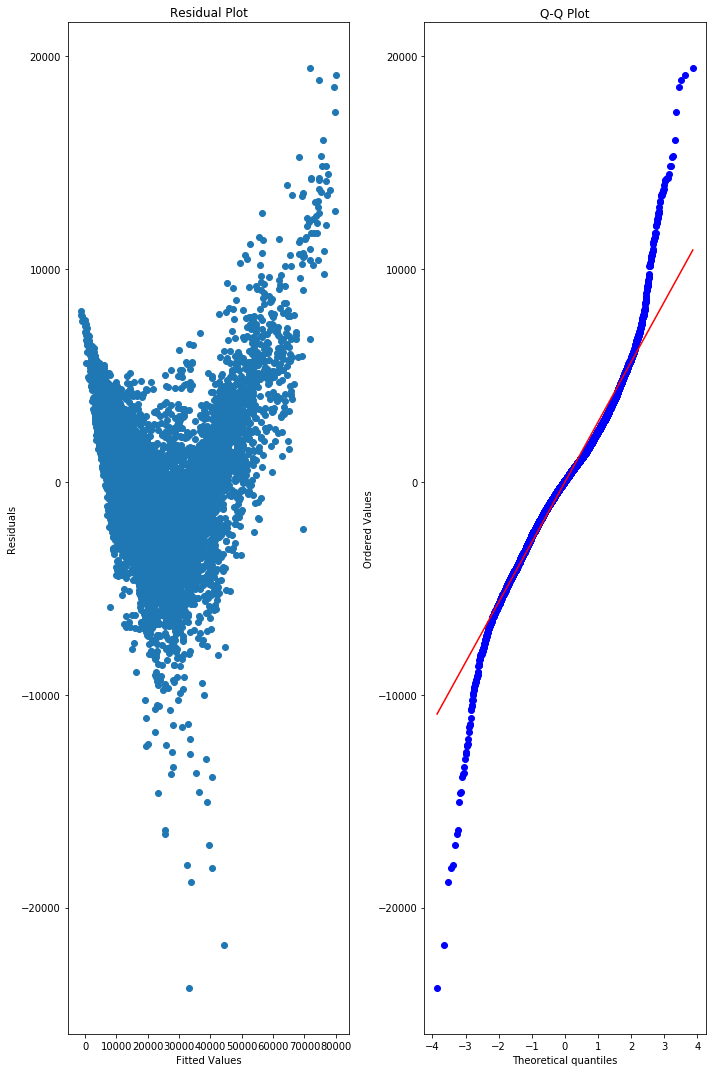

In [34]:
# 잔차 추출
residuals = model.resid

# 잔차 분석을 위한 그래프
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 15))

# 잔차 플롯 (Residual Plot)
axes[0].scatter(model.fittedvalues, residuals)
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

# Q-Q 플롯 (Quantile-Quantile Plot)
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

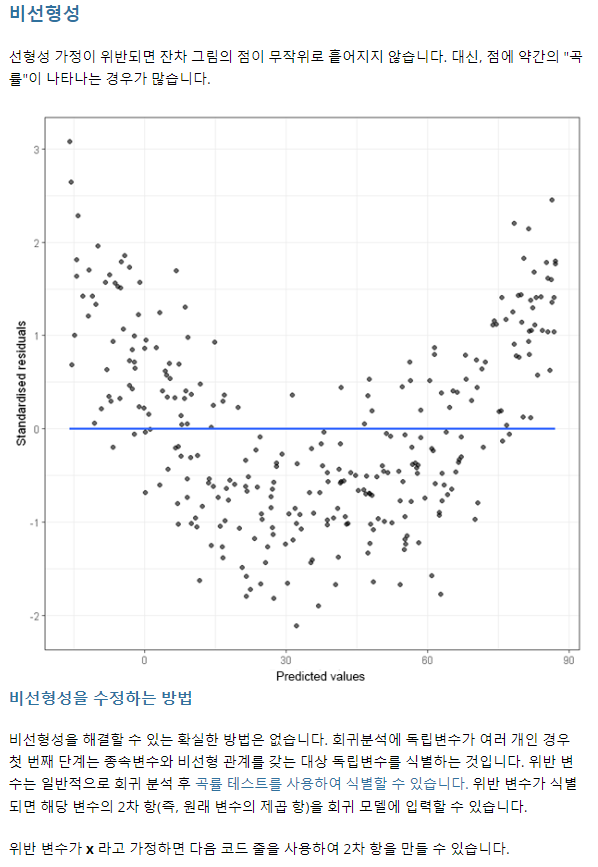